f(x) =(sin(x)/2 + cos(x)/2)** 2 * sin(x) - это для тех, кто хочет сложное уравнение
f(x) = x**2 - 6*abs(x) + 8 - это полегче.

Ответы давайте не из личных наблюдений, а стараясь подойти к этому с позиции "Пейн, я корни не вижу!"

    1.Определить корни

    2.Найти интервалы, на которых функция возрастает

    3.Найти интервалы, на которых функция убывает

    4.Построить график

    5.Вычислить вершину

    6.Определить промежутки, на котором f > 0

    7.Определить промежутки, на котором f < 0

f(x) = x**2 - 6*abs(x) + 8

In [20]:
import math
from sympy import *
x = symbols('x', real=True)
y = x**2 - 6*abs(x) + 8
y

x**2 - 6*Abs(x) + 8

1. Определить корни

In [21]:
roots = solve(y)
roots

[-4, -2, 2, 4]

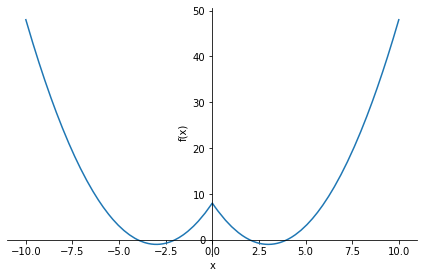

In [41]:
function = plot (y)

Найдем производную для нахождения экстремума

In [23]:
from sympy import *
x = symbols('x', real=True)
y = x**2 - 6*abs(x) + 8
roots = solve(x**2 - 6*abs(x) + 8)
der_y = diff(y)
der_y

2*x - 6*sign(x)

Корни производной (точки экстремума)

In [24]:
roots_der_y = solve(der_y)
roots_der_y

[3]

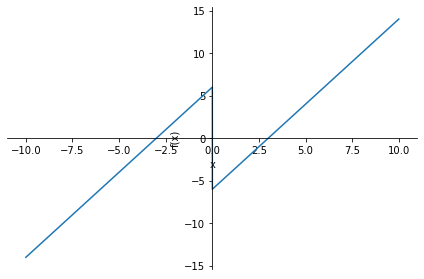

In [42]:
function = plot(der_y)

Производная равна нулю в точках 3 и -3. В точке х = 0 
видим излом функции. Добавим недостающие точки в корни производной:

In [26]:
roots_der_y.append(roots_der_y[0] * -1)
roots_der_y.append(0)
roots_der_y = sorted(roots_der_y)
roots_der_y

[-3, 0, 3]

Вычислим вершины

In [27]:
min_value = -3
max_value = 3
for i in roots_der_y:
    min_value = i-0.01 if i == 0 else i-0.01*abs(i)
    max_value = i+0.01 if i == 0 else i+0.01*abs(i)
    if der_y.evalf(subs={x: min_value}) < der_y.evalf(subs={x: i}) and der_y.evalf(subs={x: max_value}) > der_y.evalf(subs={x: i}):
        print(f'точка минимума - "{i}"')
    else:
        print(f'точка максимума - "{i}"')

точка минимума - "-3"
точка максимума - "0"
точка минимума - "3"


Интервалы, на которых функция возрастает и убывает

In [39]:
def intervals(roots):
    interval = []
    interval.append([roots[0]-1, roots[0]])
    for i in range(len(roots)-1):
        r = [roots[i], roots[i+1]]
        interval.append(r)
    interval.append([roots[-1], roots[-1]+1])
    return interval

new_interval = intervals(roots_der_y)

for i in new_interval:
    if new_interval.index(i) == 0:
        start = -oo
    else:
        start = i[0]
        
    if new_interval.index(i) == len(new_interval)-1:
        end = oo 
    else:
        end = i[1]
    if der_y.evalf(subs={x:(i[0] + i[1])/2}) > 0:
        print(f'Функция возрастает на промежутке {start, end}')
    else:
        print(f'Функция убывает на промежутке {start, end}')

Функция убывает на промежутке (-oo, -3)
Функция возрастает на промежутке (-3, 0)
Функция убывает на промежутке (0, 3)
Функция возрастает на промежутке (3, oo)


Определим промежутки, на которых f > 0 и f < 0

In [40]:
interval_y = intervals(roots)

for i in interval_y:
    start = -oo if interval_y.index(i) == 0 else i[0]
    end = oo if interval_y.index(i) == len(interval_y)-1 else i[1]
    if y.evalf(subs={x:(i[0] + i[1])/2}) > 0:
        print(f'f > 0 на промежутке {start, end}')
    else:
        print(f'f < 0 на промежутке {start, end}')

f > 0 на промежутке (-oo, -4)
f < 0 на промежутке (-4, -2)
f > 0 на промежутке (-2, 2)
f < 0 на промежутке (2, 4)
f > 0 на промежутке (4, oo)
